## Cross Validation 

Cross-validation is a statistical technique which involves partitioning the data into subsets, training the data on a subset and use the other subset to evaluate the model's performance. To reduce variability we perform multiple rounds of cross-validation with different subsets from the same data.

In statistics and machine learning, we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we `overfit` our model or we `underfit` our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data). Let’s see what under and overfitting actually mean.

## Overfitting

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.


## Underfitting

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you may guess, this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

It is worth noting the underfitting is not as prevalent as overfitting. Nevertheless, we want to avoid both of those problems in data analysis. You might say we are trying to find the middle ground between under and overfitting our model. As you will see, train/test split and cross validation help to avoid overfitting more than underfitting. Let’s dive into both of them!

<img src="figures/11.01-Underfitting-Overfitting.png">

In [2]:
# underfitting : error rate high
# just right : error rate is quite good(not that high)
# overfitting : error rate is near 0 (if there is new data, error rate is high)

In [3]:
# underfitting : traing error, testing error : high
# just right : training error, testing error : good
# overfitting : traing error: best, testing error : bad

## Train / Test Split

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

<img src="figures/11.02-train_test_split.png">

Revisiting the previous works on using Training and Testing Set, we will start to import the necessary libraries.

In [1]:
#import 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Loading Diabetes Dataset

In [2]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names -> 공백을 기준으로 나눠줌
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [4]:
df.head() # the data has been normalized
# positive : male / negative : female

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2) # 80% training, 20% testing
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#(353, 10) (353,) # 353 rows 10columns
#(89, 10) (89,) # 89 rows 10 columns

(353, 10) (353,)
(89, 10) (89,)


Let's fit on the training data.

In [9]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

The result of the first 5 predictions are as follows.

In [10]:
predictions[0:5] # the first 5 prediction result

array([248.4471386 , 151.60830826, 245.46505818, 232.86350033,
       177.32360541])

Let's plot the model.

In [11]:
# classfication : accuracy(categorical) / regression : R^2(numerical)

Text(0, 0.5, 'Predictions')

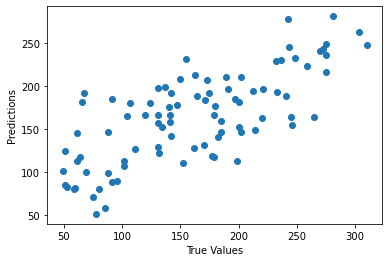

In [14]:
## The line / model
plt.scatter(y_test, predictions) # y_test : actual / true values, prediction : the result from linear regression
plt.xlabel("True Values")
plt.ylabel("Predictions")
# result of prediction similar with actual(true) value
# if it is a good model, the prediction should be at least similar to the actual
# the errorwill be very small

# X prediction이랑 y비교한 것

In [15]:
print("Score: ", model.score(X_test, y_test))
# good model : R-squared hould high
# good model : error rate should be low

Score:  0.5427695036783221


We loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data. It seems everything is fine. But train/test split does have some limitations. 

- what if the split is not random? 

- What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? 

- (imagine a file ordered by one of these). 


This will result in overfitting, even though we try to avoid it. This is the reason that we need to do cross validation. 

## Cross Validation

In the previous paragraph, there are some limitations on the use of the train/test split method. In order to avoid this, we can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

There are a bunch of cross validation methods. In this section, we will learn two things: the first is K-Folds Cross Validation and the second is Leave One Out Cross Validation (LOOCV).

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.


<img src="figures/11.03-cross_validation.png">

Training - Validation - Testing

<img src="figures/11.04-visual_cross_validation.png">

In [16]:
import numpy as np
from sklearn.model_selection import KFold # import KFold (K : integer number)
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

Let's see the result of the fold

In [18]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


## Leave-One-Out Cross Validation(하나 빼고)

This is another method for cross validation, Leave One Out Cross Validation (by the way, these methods are not the only two, there are a bunch of other methods for cross validation. Check them out in the Sklearn website). In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like k-fold. 

Some examples are 
- leave-one-subject-out; The dataset contains a lot of subjects. One subject could be the testing and the remaining subjects could be the training set.

- leave-one-day-out; The dataset contains a lot of days of experiment. One day could be the testing and the remaining days could be the training set. 

- leave-one-trace-out; A trace (or sequence) can be set as a testing set while the remaining traces could be the training set.

In [19]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


So, what method should we use? How many folds? Well, the more folds we have, we will reduce the error due the bias but increase the error due to variance; the computational price would go up too, obviously — the more folds you have, the longer it would take to compute it and you would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper. Therefore, in big datasets, k=3 is usually advised. In smaller datasets, as I’ve mentioned before, it’s best to use LOOCV.

In [20]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [24]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [25]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6) # cross validation(k=6):6 -> model은 조금 위, df와 y는 바로 위
print("Cross-validated scores:", scores)
# first iteration : 0.4554861
# second iteration : 0.46138572....
# 이건 6 iteration
# 6번째가 가장 highest one
# 6개의 average 구하기
# 이건 r-squared임 (왜냐면 regression이기 때문)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


As you can see, the last fold improved the score of the original model — from 0.455 to 0.569.

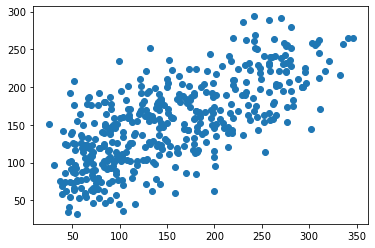

In [28]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

You can see it’s very different from the original plot from earlier. It is six times as many points as the original plot because I used cv=6.
Finally, let’s check the R² score of the model (R² is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate is our model):

In [29]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640775


## Example using K-Fold Cross Validation Iris Dataset

In the next example, we can see how to create a model using K-fold cross validation. First, we need to create a model. Next, we need to loop until the length of the K-fold. The accuracy score could be retrieved based on the average of the measures.

In [30]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data # 
y = iris.target # setosa, verginica, vergicolor


# x = df.loc[:, features].values # array # feature에 있는 값 반환
# y = df.loc[:,['target']].values # array # 'target' attribute에 있는 값 반환

scorelist = []
# fit a model
clf = DecisionTreeClassifier()

kf = KFold(n_splits=5) # 150 data -> 5 factor , 30 times for validation & training

for train_index, test_index in kf.split(range(len(X))):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scorelist.append(score)
    print(score)

TRAIN: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
1.0
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 1

In [31]:
scorelist

[1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.7333333333333333]

In [32]:
import numpy as np
sl = np.array(scorelist)

In [33]:
print(np.mean(sl))
print(np.median(sl))
print(np.min(sl))
print(np.max(sl))

0.9066666666666666
0.9333333333333333
0.7333333333333333
1.0


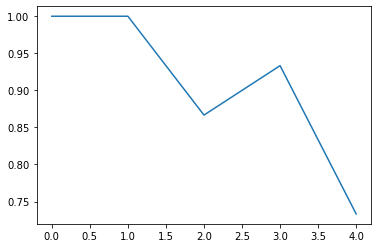

In [34]:
plt.plot(sl)
plt.show()

### Summary

Cross validation approach is mostly used to overcome overfitting and underfitting issues. 